In [1]:
import pandas as pd
import numpy as np

**ARIMA** is composed of the AR + I + MA model

#### AR, AutoRegression model

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [3]:
population_df = pd.read_csv("UDEMY_TSA_FINAL/Data/uspopulation.csv", index_col='DATE', parse_dates=True)

In [4]:
population_df.index.freq = 'MS'

In [5]:
population_df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


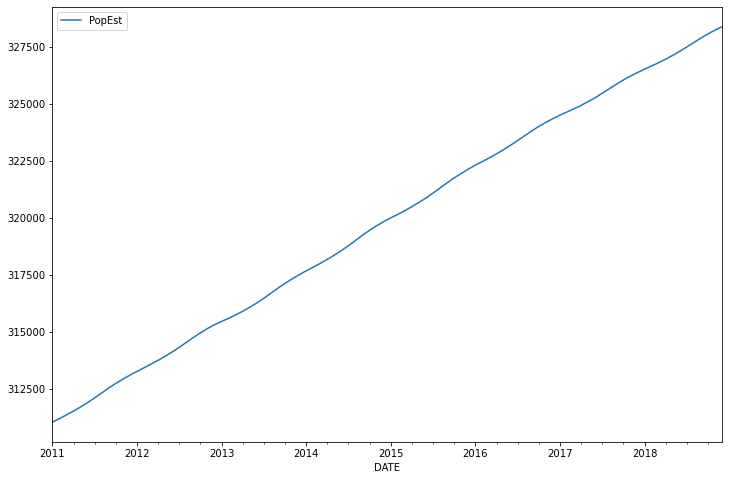

In [6]:
population_df.plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

In [7]:
train = population_df[:84]
test = population_df[84:]

# train = population_df.iloc[:84]
# test = population_df.iloc[84:]

In [8]:
len(test)

12

In [9]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [10]:
AR1model = AR(train['PopEst'])

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [11]:
# AR model with lag length 1
AR1fit = AR1model.fit(maxlag=1)

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [13]:
# start and end index for the prediction
start = len(train)
end = len(train) + len(test) - 1

In [14]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [15]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [16]:
predictions1 = AR1fit.predict(start=start, end=end)

In [17]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [18]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

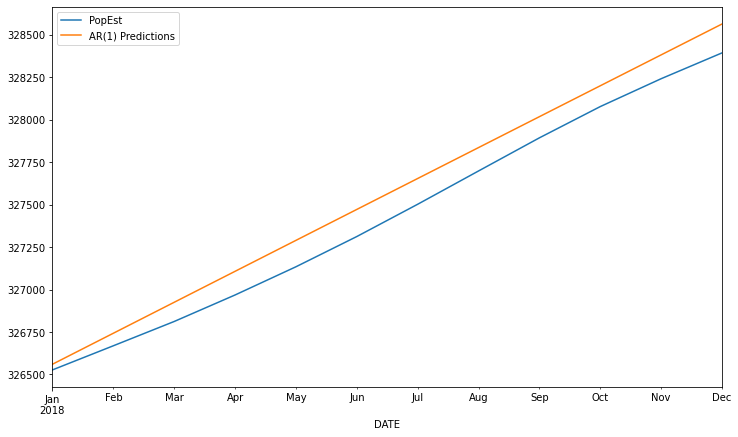

In [19]:
test.plot(figsize=(12, 7), legend=True).autoscale(axis='x', tight=True)
predictions1.plot(legend=True)

In [20]:
AR2fit = AR1model.fit(maxlag=2)

RuntimeError: 
Model has been fit using maxlag=1, method=cmle, ic=None, trend=c. These
cannot be changed in subsequent calls to `fit`. Instead, use a new instance of
AR.


In [21]:
# AR model with lag length 2

AR2model = AR(train['PopEst'])
AR2fit = AR2model.fit(maxlag=2)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [22]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [23]:
predictions2 =  AR2fit.predict(start, end)
predictions2 = predictions2.rename('AR(2) Predictions')

<AxesSubplot:xlabel='DATE'>

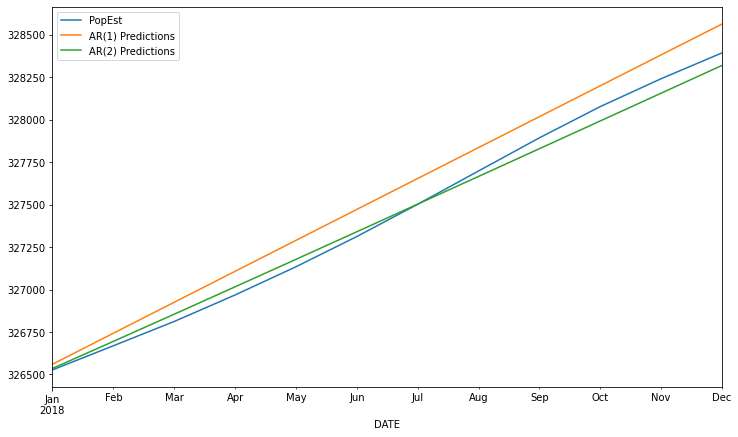

In [24]:
test.plot(figsize=(12, 7), legend=True).autoscale(axis='x', tight=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

Instead of specifying the ```maxlag```, we will let the model determine the lag length. And to get the optimal lag length we will determine the ```ic``` parameter.

In [25]:
ARmodel = AR(train['PopEst'])
ARfit = ARmodel.fit(ic='t-stat')

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\U

In [26]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [27]:
# AR model with optimum lag length (t-stat criterion) 8

predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
labels = ['AR1', 'AR2', 'AR8']
preds = [predictions1, predictions2, predictions8]

In [31]:
for i in range(3):
    error = np.sqrt(mean_squared_error(test['PopEst'], preds[i]))
    print(f"{labels[i]} RMSE was: {error}")

AR1 RMSE was: 132.09736651630504
AR2 RMSE was: 52.08894938403712
AR8 RMSE was: 13.673763802476532


<AxesSubplot:xlabel='DATE'>

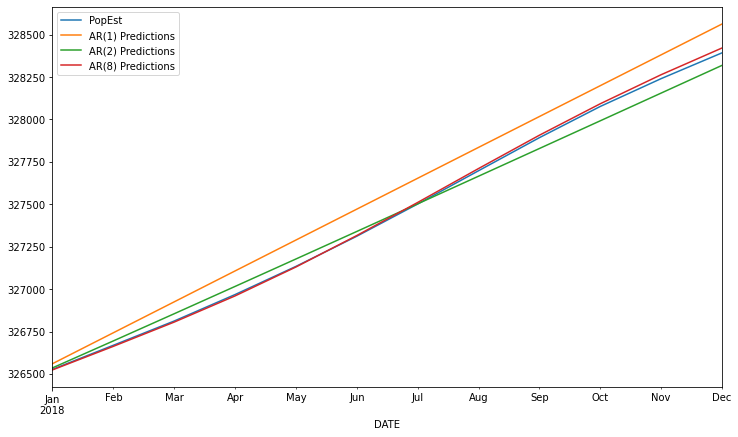

In [32]:
test.plot(figsize=(12, 7), legend=True).autoscale(axis='x', tight=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [36]:
# Forecasting __ future!!!
model = AR(population_df['PopEst'])

fitted_model = model.fit(ic='t-stat')

forcasted_values = fitted_model.predict(start=len(population_df), end=len(population_df)+12).rename('Forecast')

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='DATE'>

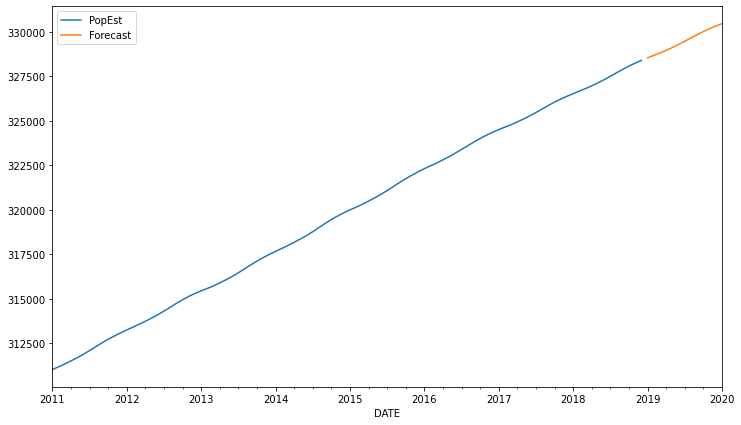

In [37]:
population_df.plot(figsize=(12, 7), legend=True).autoscale(axis='x', tight=True)
forcasted_values.plot(legend=True)